<a href="https://colab.research.google.com/github/pirisc/Background-generator/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Mar 19 11:40:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   72C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

* **Camera and photo apps** use computer vision to enhance and sort images
* **Modern cars** use computer vision to avoid other cars and stay within lane lines
* **Manufactorers** use computer vision to identify defects in various products
* **Security cameras** use computer vision to detect potential intruders

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

**Overfitting** means creating a model that learns the training set so well that fails to make predictions on new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Some ways to prevent overfitting:
* EarlyStopping callback: it pauses the training phase before the machine learning model learns the noise in the data.
* Data augmentation: is a ML technique that changes the sample data sligthly every time the model processed it. For example, applying transformations such as translations, flipping and rotation to input images.
* Cross-validation: use your initial training data to generate multiple mini train-test splits. Use these splits to tune your model


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Setup training data
train_data = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

# Setup testing data
test_data = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform= ToTensor()
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 13.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 440kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.02MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.46MB/s]


## 6. Visualize at least 5 different samples of the MNIST training dataset.

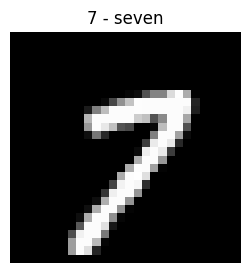

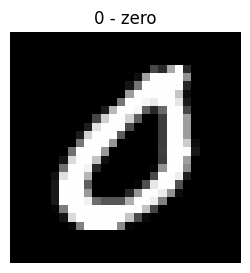

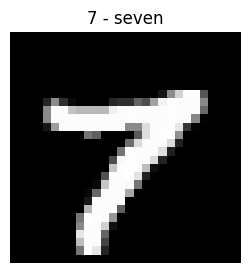

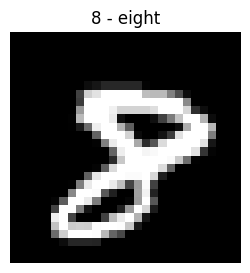

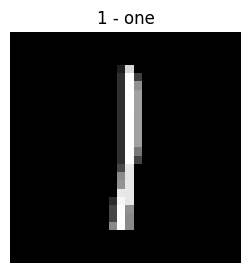

In [24]:
import matplotlib.pyplot as plt

class_names = train_data.classes

for i in range(5):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img,label = train_data[random_idx]
  plt.figure(figsize=(3,3))
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

# Setup the batch size
BATCH_SIZE = 32

# Turn dataset into iterables
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

In [25]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
class FashionMNISTModelV0(nn.Module):
  """ Model architecture copying TinyVGG"""
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

In [7]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)
model_0

FashionMNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [8]:
# Download helper_functions
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_function..py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_funtions.py","wb") as f:
    f.write(request.content)

In [9]:
from helper_funtions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.1)

In [10]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  """ Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc =0,0

  # Put model into training model
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true= y,
                             y_pred = y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")



In [11]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
  """ Performs a testing loop step on model going over data_loader"""
  test_loss, test_acc = 0,0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode
  with torch.inference_mode():
    for X, y in data_loader:
      # Sedn the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y,
                              test_pred.argmax(dim=1))

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [12]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
train_time_start_on_gpu = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----------")
  train_step(data_loader=train_dataloader,
             model = model_0,
             loss_fn =  loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(data_loader=test_dataloader,
            model = model_0,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device =device)

train_time_end_on_gpu = timer()
total_train_time = train_time_end_on_gpu - train_time_start_on_gpu
print (f"Total time: {total_train_time:.5f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss: 0.26770 | Train acc: 91.23%
Test loss: 0.07635 | Test acc: 97.50%

Epoch: 1
-----------
Train loss: 0.07008 | Train acc: 97.82%
Test loss: 0.04389 | Test acc: 98.48%

Epoch: 2
-----------
Train loss: 0.05557 | Train acc: 98.29%
Test loss: 0.04497 | Test acc: 98.61%

Epoch: 3
-----------
Train loss: 0.04578 | Train acc: 98.56%
Test loss: 0.04360 | Test acc: 98.43%

Epoch: 4
-----------
Train loss: 0.04090 | Train acc: 98.69%
Test loss: 0.03519 | Test acc: 98.70%

Total time: 57.13396 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [13]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare data
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # Forward pass
      pred_logit = model(sample)
      # Get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim =0)
      # Get pred_prob off the GPU
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [14]:
import random
test_samples = []
test_labels= []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]}")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 8


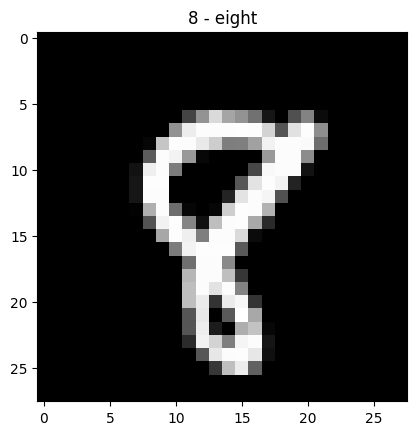

In [15]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]]);

In [16]:
# Make predictions
pred_probs = make_predictions(model=model_0,
                              data = test_samples)
pred_probs[:5]

tensor([[5.8601e-09, 8.7017e-07, 3.6638e-08, 4.6511e-06, 9.9395e-07, 2.9775e-07,
         1.3116e-08, 1.4358e-05, 9.8721e-01, 1.2773e-02],
        [9.9988e-01, 1.3148e-11, 9.3027e-05, 1.0247e-07, 5.2162e-09, 4.6842e-08,
         3.9767e-09, 1.1878e-08, 5.7724e-06, 2.5792e-05],
        [1.0000e+00, 5.1240e-15, 9.7713e-07, 4.3097e-12, 6.9239e-12, 7.9968e-11,
         6.5341e-08, 3.7676e-10, 3.3201e-08, 1.2075e-09],
        [1.0000e+00, 1.3614e-14, 1.5165e-07, 1.0180e-11, 2.4379e-12, 3.3354e-10,
         1.4780e-07, 2.9479e-10, 1.3160e-08, 2.6353e-09],
        [9.9996e-01, 2.0249e-13, 3.9205e-05, 5.9223e-10, 1.1525e-10, 1.1200e-09,
         3.0098e-06, 6.9897e-10, 3.9216e-08, 1.7394e-06]])

In [17]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 0, 0, 0, 0, 1, 7, 9, 4])

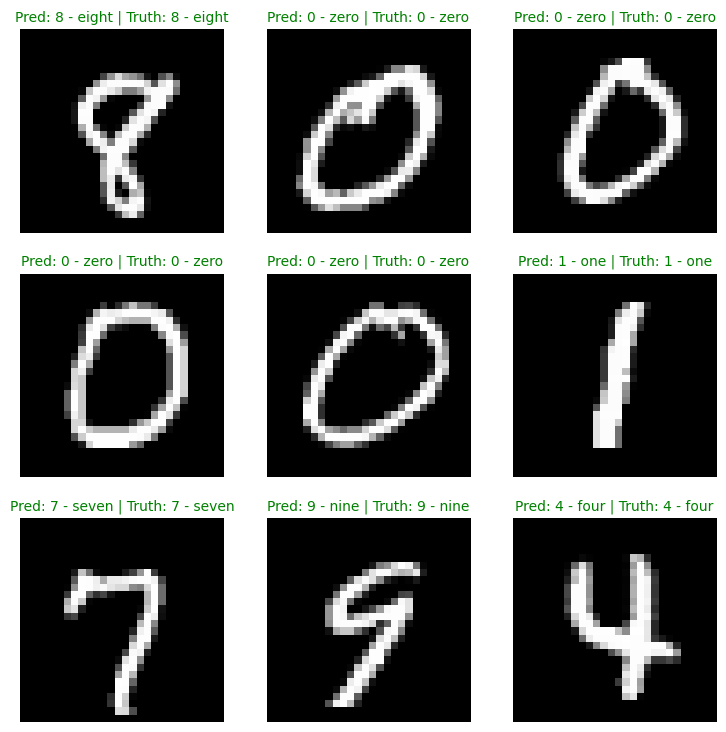

In [18]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot for each sample
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") # red text if prediction not as truth

  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [19]:
# 1. Make predictions with trained model
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions....."):
    # Data to target device
    X,y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_0(X)
    # Turn predictions from logits to labels
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    # Put predictions on CPU
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:5]

Making predictions.....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1, 0, 8])

In [20]:
try:
  import torchmetrics, mlxtend
  print(f"mlextend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >=19,"mlextend version should be 0.19.0 or higher"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlextend version: {mlxtend.__version__}")


mlextend version: 0.23.4


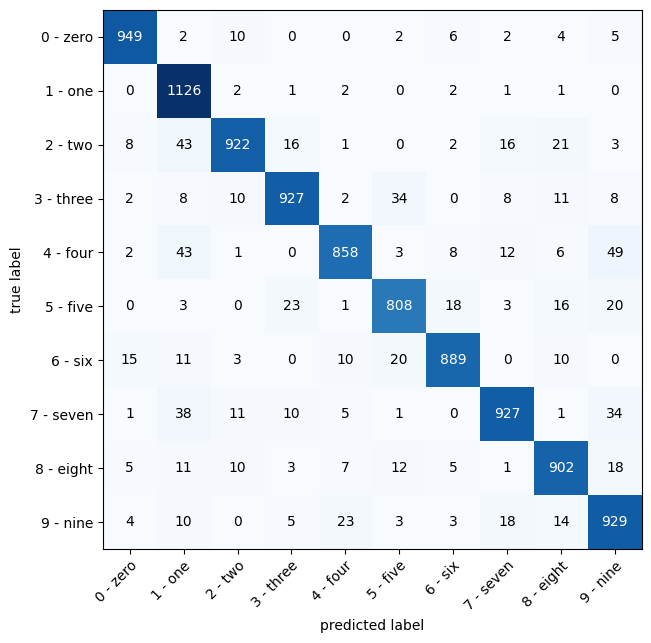

In [21]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to target
confmat = ConfusionMatrix(task="multiclass", num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names = class_names,
    figsize=(10,7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?